<a href="https://colab.research.google.com/github/JoseJ09/MNIST/blob/main/Reto_01_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Parametros de la base de datos
num_classes = 10
input_shape = (28, 28, 1)

# Cargar los datos y dividirlos en los sets necesarios
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Escalar las imagenes entre [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Añadir una dimension para el modelo (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape[0], "Cantidad de muestras para entrenamiento")
print(x_test.shape[0], "Cantidad de muestras para pruebas")


# Convertir las clases a un sistema de salida
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 Cantidad de muestras para entrenamiento
10000 Cantidad de muestras para pruebas


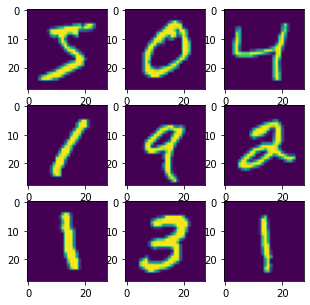

In [ ]:
# Visualizar los datos

plt.figure(figsize=(5,5))
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape((28,28)))
plt.show()

In [ ]:
#Construir el modelo de acuerdo a las diapositivas

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5, 5), activation="relu", padding = 'valid'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu", padding = 'valid'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(256),
        layers.Dense(120),
        layers.Dense(84),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               6

In [ ]:
# Entrenar el modelo

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 7ms/step - loss: 0.2308 - accuracy: 0.9326 - val_loss: 0.0805 - val_accuracy: 0.9755
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0822 - accuracy: 0.9745 - val_loss: 0.0635 - val_accuracy: 0.9812
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0523 - val_accuracy: 0.9857
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0603 - val_accuracy: 0.9835
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0525 - val_accuracy: 0.9855
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0518 - val_accuracy: 0.9857
Epoch 7/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0504 - val_accuracy: 0.9855
Epoch

In [ ]:
# Evaluar el modelo

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.047482267022132874
Test accuracy: 0.9871000051498413


In [ ]:
x_test[0].shape

(28, 28, 1)

1/1 [==============================] - 0s 152ms/step
Prediccion:  7
Real:  7


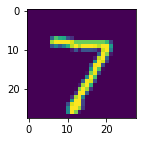

Prediccion:  2
Real:  2


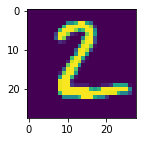

Prediccion:  1
Real:  1


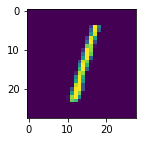

Prediccion:  0
Real:  0


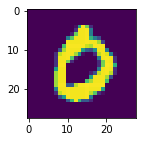

Prediccion:  4
Real:  4


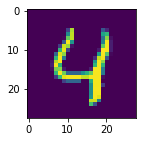

Prediccion:  1
Real:  1


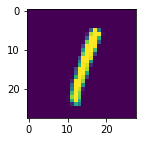

Prediccion:  4
Real:  4


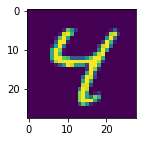

Prediccion:  9
Real:  9


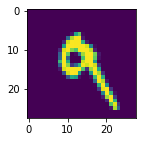

Prediccion:  5
Real:  5


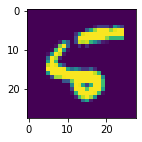

In [ ]:
# Ver los resultados de testing
resultados = model.predict(x_test[0:9])
for i in range(0,9):
  print('Prediccion: ',resultados[i].argmax())
  print('Real: ', y_test[i].argmax())
  plt.figure(figsize=(2,2))
  plt.imshow(x_test[i].reshape((28,28)))
  plt.show()